<a href="https://colab.research.google.com/github/krishnaaxo/AutoMobileCarPricePrediction/blob/main/Thyroid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing


warnings.filterwarnings('ignore')

In [191]:
dataset = pd.read_csv('full_dataset.csv')
dataset.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,80,1,1.4,0.8,105.0,0.88,120.0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,74,0,0.0,0.7,98.0,0.81,121.0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,32,0,1.4,1.1,121.0,1.11,109.0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,42,0,2.3,1.1,93.0,0.73,127.0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,89,1,0.8,0.8,111.0,0.68,165.0,1


In [192]:

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [193]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3152 entries, 0 to 3151
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   on_thyroxine               3152 non-null   int64  
 1   query_on_thyroxine         3152 non-null   int64  
 2   on_antithyroid_medication  3152 non-null   int64  
 3   thyroid_surgery            3152 non-null   int64  
 4   query_hypothyroid          3152 non-null   int64  
 5   query_hyperthyroid         3152 non-null   int64  
 6   pregnant                   3152 non-null   int64  
 7   sick                       3152 non-null   int64  
 8   tumor                      3152 non-null   int64  
 9   lithium                    3152 non-null   int64  
 10  goitre                     3152 non-null   int64  
 11  TSH_measured               3152 non-null   int64  
 12  T3_measured                3152 non-null   int64  
 13  TT4_measured               3152 non-null   int64

In [194]:
dataset.describe()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
count,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000
mean,0.145305,0.017449,0.013325,0.032995,0.075825,0.077094,0.019987,0.030774,0.012690,0.000635,0.031409,0.852157,0.779822,0.921003,0.921320,0.921637,51.359772,0.295051,5.689591,1.992291,109.016783,0.983284,114.809613,0.091371
std,0.352464,0.130959,0.114680,0.178652,0.264760,0.266783,0.139979,0.172733,0.111952,0.025186,0.174447,0.355000,0.414432,0.269778,0.269282,0.268785,19.226176,0.456138,22.953469,1.036009,45.085350,0.234424,59.028114,0.288181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.400000,83.000000,0.850000,90.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,0.000000,0.700000,1.900000,104.000000,0.960000,107.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000,2.200000,2.400000,128.000000,1.070000,128.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,530.000000,10.200000,450.000000,2.210000,881.000000,1.000000


In [195]:
dataset.isnull().sum()

on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
age                          0
sex                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
classes                      0
dtype: int64

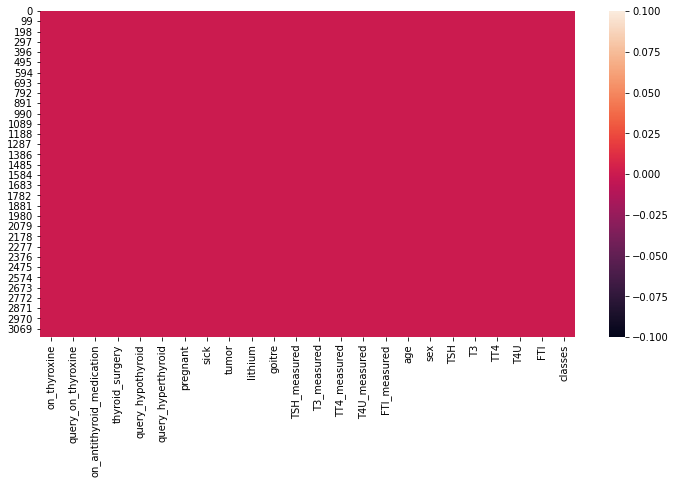

In [196]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.isnull())
plt.show()

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[  0.     0.     0.   ... 109.     1.62  67.  ]
 [  0.     0.     0.   ... 120.     0.78 154.  ]
 [  0.     0.     0.   ...  86.     0.81 106.  ]
 ...
 [  0.     0.     0.   ...  86.     1.05  82.  ]
 [  0.     0.     0.   ...  78.     0.86  91.  ]
 [  0.     0.     0.   ...  47.     0.97  48.  ]]
[0 0 0 ... 0 0 0]
[[  1.     0.     0.   ...  83.     0.89  93.  ]
 [  0.     0.     0.   ... 104.     0.99 105.  ]
 [  0.     0.     0.   ... 126.     1.29  98.  ]
 ...
 [  0.     0.     0.   ... 125.     1.14 110.  ]
 [  0.     0.     0.   ... 107.     0.66 162.  ]
 [  0.     0.     1.   ... 106.     1.07 107.  ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.4119684  -0.1344911  -0.11527191 ...  0.00958737  2.70854849
  -0.81392632]
 [-0.4119684  -0.1344911  -0.11527191 ...  0.25376951 -0.86569875
   0.67479301]
 [-0.4119684  -0.1344911  -0.11527191 ... -0.50097529 -0.73804706
  -0.14656938]
 ...
 [-0.4119684  -0.1344911  -0.11527191 ... -0.50097529  0.28316643
  -0.55725057]
 [-0.4119684  -0.1344911  -0.11527191 ... -0.6785623  -0.52529425
  -0.40324513]
 [-0.4119684  -0.1344911  -0.11527191 ... -1.36671196 -0.05723807
  -1.13904893]]
[[ 2.42737065 -0.1344911  -0.11527191 ... -0.56757041 -0.39764257
  -0.36902169]
 [-0.4119684  -0.1344911  -0.11527191 ... -0.10140451  0.02786306
  -0.1636811 ]
 [-0.4119684  -0.1344911  -0.11527191 ...  0.38695977  1.30437993
  -0.28346311]
 ...
 [-0.4119684  -0.1344911  -0.11527191 ...  0.36476139  0.66612149
  -0.07812251]
 [-0.4119684  -0.1344911  -0.11527191 ... -0.03480938 -1.3763055
   0.81168674]
 [-0.4119684  -0.1344911   8.6751406  ... -0.05700776  0.36826756
  -0.12945766]]


In [199]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
y_pred1 = classifier1.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
a=accuracy_score(y_test, y_pred1)
a


[[714   9]
 [ 21  44]]


0.9619289340101523

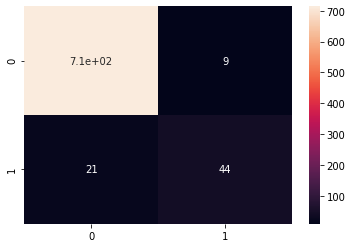

In [202]:
sns.heatmap(cm, annot=True)

In [203]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [204]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.9555837563451777

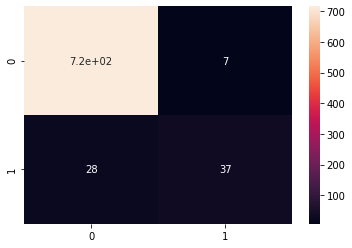

In [205]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True)
b=accuracy_score(y_test, y_pred2)
b

In [206]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [207]:
y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.9543147208121827

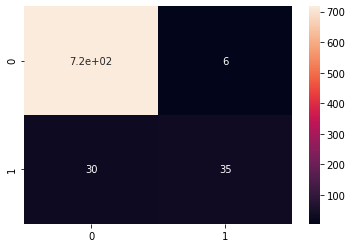

In [208]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, annot=True)
c=accuracy_score(y_test, y_pred3)
c

In [209]:
from sklearn.ensemble import RandomForestClassifier
classifier4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [210]:
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.9746192893401016


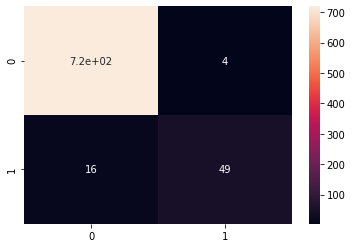

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True)
d=accuracy_score(y_test, y_pred4)
print(d)

In [212]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.3629441624365482

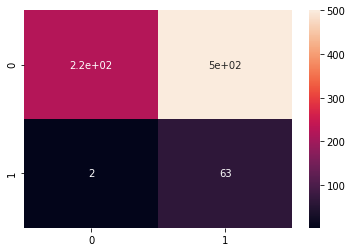

In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5,annot=True)
e=accuracy_score(y_test, y_pred5)
e

In [214]:
data = [a,b,c,d,e]
index = ['Logistic Regression', 'KNeighborsClassifier', 'Kernel SVC', 'RandomForestClassifier', 'Naive Bayes']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
RandomForestClassifier,0.974619
Logistic Regression,0.961929
KNeighborsClassifier,0.955584
Kernel SVC,0.954315
Naive Bayes,0.362944


In [215]:
from imblearn.over_sampling import RandomOverSampler

In [216]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)


In [217]:
pip install -U keras-tuner

Requirement already up-to-date: keras-tuner in /usr/local/lib/python3.6/dist-packages (1.0.2)


In [218]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [219]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [220]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='project',
    project_name='Thyroid')

INFO:tensorflow:Reloading Oracle from existing project project/Thyroid/oracle.json
INFO:tensorflow:Reloading Tuner from project/Thyroid/tuner0.json


In [221]:
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [222]:
tuner.search(X_train_ns, y_train_ns,
             epochs=2,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [223]:
tuner.results_summary()

Results summary
Results in project/Thyroid
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 13
units_0: 288
units_1: 448
learning_rate: 0.001
units_2: 192
units_3: 320
units_4: 416
units_5: 96
units_6: 352
units_7: 128
units_8: 128
units_9: 384
units_10: 448
units_11: 352
units_12: 288
Score: 0.9530456960201263
Trial summary
Hyperparameters:
num_layers: 13
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: 0.9447969496250153
Trial summary
Hyperparameters:
num_layers: 18
units_0: 448
units_1: 224
learning_rate: 0.001
units_2: 384
units_3: 416
units_4: 96
units_5: 480
units_6: 448
units_7: 480
units_8: 160
units_9: 320
units_10: 384
units_11: 416
units_12: 352
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.942258894443512
Trial summary
Hyperparameters:
num_layers

In [224]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import tensorflow as tf

from sklearn import metrics
from sklearn import preprocessing


warnings.filterwarnings('ignore')

In [225]:
dataset = pd.read_csv('full_dataset.csv')
dataset.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,80,1,1.4,0.8,105.0,0.88,120.0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,74,0,0.0,0.7,98.0,0.81,121.0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,32,0,1.4,1.1,121.0,1.11,109.0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,42,0,2.3,1.1,93.0,0.73,127.0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,89,1,0.8,0.8,111.0,0.68,165.0,1


In [226]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ns = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [229]:
ann = tf.keras.models.Sequential()

In [230]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [231]:
ann.add(tf.keras.layers.Dense(units=64, kernel_initializer = 'he_uniform',activation='relu'))

In [232]:
ann.add(tf.keras.layers.Dense(units=44, kernel_initializer = 'he_uniform',activation='relu'))

In [233]:
ann.add(tf.keras.layers.Dense(units=48, kernel_initializer = 'he_uniform',activation='relu'))

In [234]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [235]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [236]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [237]:
ann.add(tf.keras.layers.Dense(units=40, kernel_initializer = 'he_uniform',activation='relu'))

In [238]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [239]:
ann.add(tf.keras.layers.Dense(units=48, kernel_initializer = 'he_uniform',activation='relu'))

In [240]:
ann.add(tf.keras.layers.Dense(units=48, kernel_initializer = 'he_uniform',activation='relu'))

In [241]:
ann.add(tf.keras.layers.Dense(units=44, kernel_initializer = 'he_uniform',activation='relu'))

In [242]:
ann.add(tf.keras.layers.Dense(units=42, kernel_initializer = 'he_uniform',activation='relu'))

In [243]:
ann.add(tf.keras.layers.Dense(units=48, kernel_initializer = 'he_uniform',activation='relu'))

In [244]:
ann.add(tf.keras.layers.Dense(units=32, kernel_initializer = 'he_uniform',activation='relu'))

In [245]:
ann.add(tf.keras.layers.Dense(units=1,kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [246]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [247]:
model_history=ann.fit(X_train, y_train, batch_size = 32, epochs = 300)

Epoch 1/300
74/74 [==============================] - 1s 4ms/step - loss: 0.9226 - accuracy: 0.8563
Epoch 2/300
74/74 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.9110
Epoch 3/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8988
Epoch 4/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2845 - accuracy: 0.8998
Epoch 5/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2776 - accuracy: 0.8988
Epoch 6/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.9090
Epoch 7/300
74/74 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.9071
Epoch 8/300
74/74 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.9074
Epoch 9/300
74/74 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.9119
Epoch 10/300
74/74 [==============================] - 0s 4ms/step - loss: 0.2541 - accuracy: 0.9079
Epoch 11/

In [248]:
y_pred = ann.predict_classes(X_test)

0.682741116751269

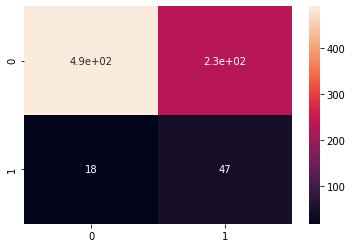

In [249]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm6 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm6,annot=True)
acc9=accuracy_score(y_test, y_pred)
acc9